# Data Science Final Project 

## DC Housing 

### Rajat Dua

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get The Data

In [116]:
df = pd.read_csv("DC_Properties_trimmed.csv")

In [117]:
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,3,1,Hot Water Rad,Y,2,9,5,1910,2009,1984,...,-77.040678,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,3,1,Hot Water Rad,Y,2,8,5,1900,2003,1984,...,-77.040629,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BATHRM              28900 non-null  int64  
 1   HF_BATHRM           28900 non-null  int64  
 2   HEAT                28900 non-null  object 
 3   AC                  28900 non-null  object 
 4   NUM_UNITS           28900 non-null  int64  
 5   ROOMS               28900 non-null  int64  
 6   BEDRM               28900 non-null  int64  
 7   AYB                 28900 non-null  int64  
 8   YR_RMDL             28900 non-null  int64  
 9   EYB                 28900 non-null  int64  
 10  STORIES             28900 non-null  float64
 11  SALEDATE            28900 non-null  object 
 12  PRICE               28900 non-null  int64  
 13  QUALIFIED           28900 non-null  object 
 14  SALE_NUM            28900 non-null  int64  
 15  GBA                 28900 non-null  int64  
 16  BLDG

In [119]:
df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE,X,Y
count,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,2.890000e+04,...,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000
mean,2.333806,0.662007,1.261246,7.502872,3.482318,1922.556574,2004.259273,1969.125433,2.165972,6.549323e+05,...,0.715848,13.724637,2852.047197,20009.906851,38.913195,-77.010707,5509.161730,2663.814844,-77.010712,38.913201
std,1.038695,0.588201,0.635730,2.319767,1.160678,22.339850,17.183443,10.547762,5.563060,6.048247e+05,...,0.982890,4.704569,2865.397209,7.541925,0.030292,0.041245,3297.000377,1704.447584,0.041238,0.030293
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1915.000000,0.000000,1.000000e+00,...,0.000000,11.000000,216.000000,20001.000000,38.819731,-77.113909,100.000000,65.000000,-77.113135,38.820576
25%,2.000000,0.000000,1.000000,6.000000,3.000000,1908.000000,2002.000000,1964.000000,2.000000,3.100000e+05,...,0.000000,11.000000,1419.000000,20002.000000,38.892645,-77.033455,2301.000000,1052.000000,-77.033397,38.892800
50%,2.000000,1.000000,1.000000,7.000000,3.000000,1923.000000,2008.000000,1967.000000,2.000000,5.475000e+05,...,0.000000,12.000000,1943.000000,20010.000000,38.911306,-77.005555,6700.000000,2621.000000,-77.005088,38.911421
75%,3.000000,1.000000,1.000000,8.000000,4.000000,1938.000000,2012.000000,1972.000000,2.000000,8.100000e+05,...,1.000000,13.000000,3366.000000,20016.000000,38.933681,-76.985763,8301.000000,4011.000000,-76.986004,38.933636
max,11.000000,11.000000,6.000000,31.000000,20.000000,2015.000000,2018.000000,2017.000000,826.000000,2.396029e+07,...,13.000000,39.000000,155905.000000,20036.000000,38.982532,-76.909758,11100.000000,6277.000000,-76.910511,38.982276


## Seperate Categorical and Numerical Data

In [6]:
numeric_data = df.select_dtypes(include = [np.number])

categorical_data = df.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 24 numerical and 22 categorical features in the data


## Checking For Missing Data

In [7]:
print((df.isnull().sum()/len(df))*100 >0)

BATHRM                False
HF_BATHRM             False
HEAT                  False
AC                    False
NUM_UNITS             False
ROOMS                 False
BEDRM                 False
AYB                   False
YR_RMDL               False
EYB                   False
STORIES               False
SALEDATE              False
PRICE                 False
QUALIFIED             False
SALE_NUM              False
GBA                   False
BLDG_NUM              False
STYLE                 False
STRUCT                False
GRADE                 False
CNDTN                 False
EXTWALL               False
ROOF                  False
INTWALL               False
KITCHENS              False
FIREPLACES            False
USECODE               False
LANDAREA              False
GIS_LAST_MOD_DTTM     False
SOURCE                False
FULLADDRESS           False
CITY                  False
STATE                 False
ZIPCODE               False
NATIONALGRID          False
LATITUDE            

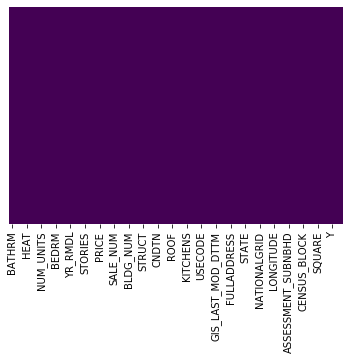

In [8]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

# Exploratory Data Analysis

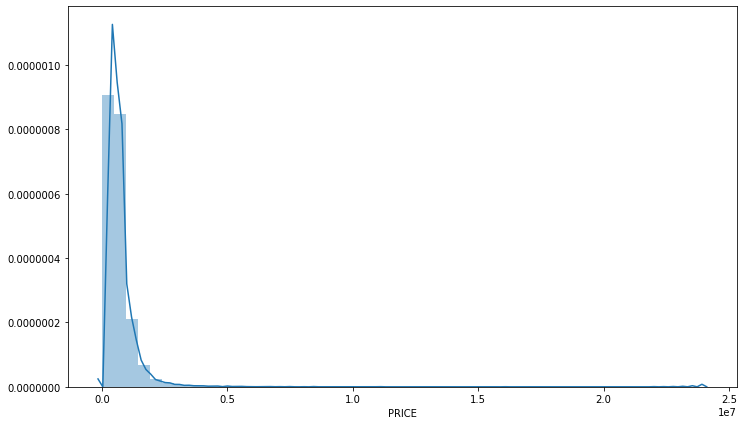

In [9]:
plt.figure(figsize = (12,7))
sns.distplot(df['PRICE'])

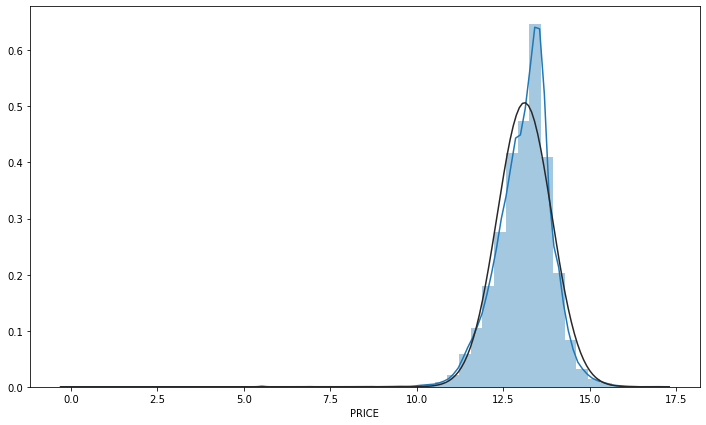

In [10]:
from scipy.stats import norm
plt.figure(figsize = (12,7))
sns.distplot(np.log(df['PRICE']), fit = norm)

In [11]:
type(df['SALEDATE'][0])

str

In [12]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'], format="%m/%d/%Y")

In [13]:
df['SALEDATE'].head()

0   2003-11-25
1   2016-06-21
2   2006-07-12
3   2011-09-29
4   2018-05-03
Name: SALEDATE, dtype: datetime64[ns]

In [14]:
df['SALEYEAR'] = df['SALEDATE'].dt.year
df['SALEYEAR'].head()

0    2003
1    2016
2    2006
3    2011
4    2018
Name: SALEYEAR, dtype: int64

In [15]:
df['SALEMONTH'] = df['SALEDATE'].dt.month
df['SALEMONTH'].head()

0    11
1     6
2     7
3     9
4     5
Name: SALEMONTH, dtype: int64

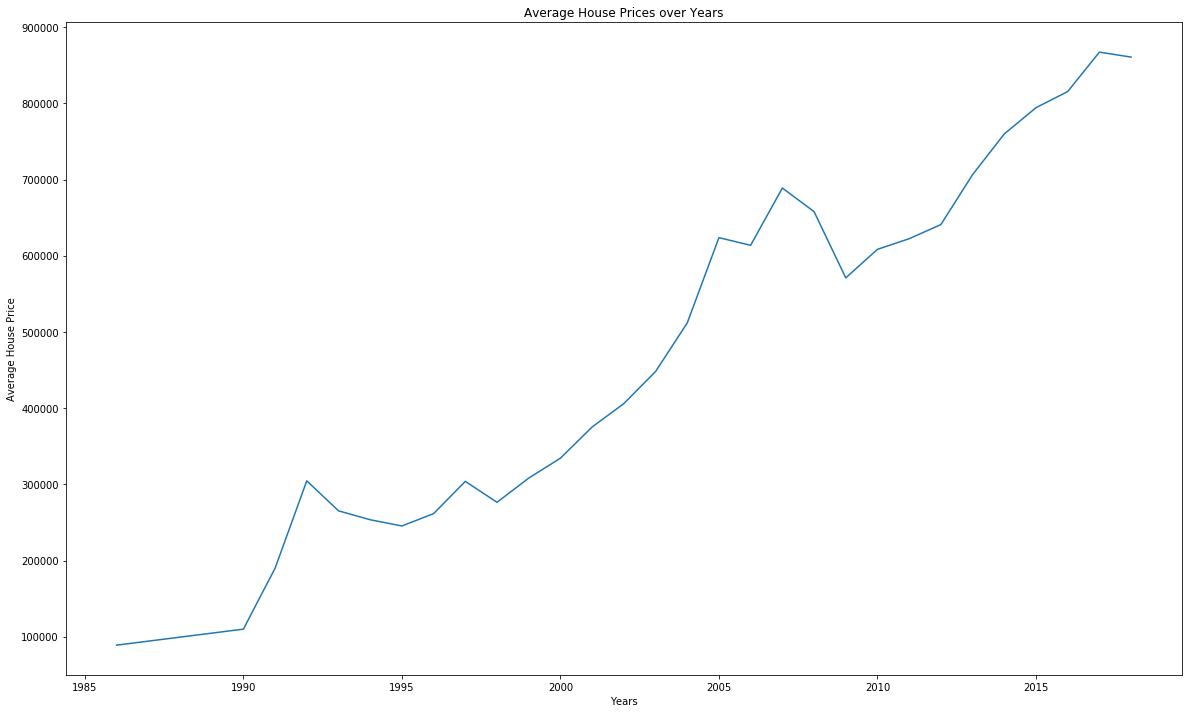

In [16]:
df.groupby(['SALEYEAR']).mean()['PRICE'].plot(kind = 'line', figsize = (20,12))
plt.title('Average House Prices over Years')
plt.xlabel('Years')
plt.ylabel('Average House Price')
plt.show()

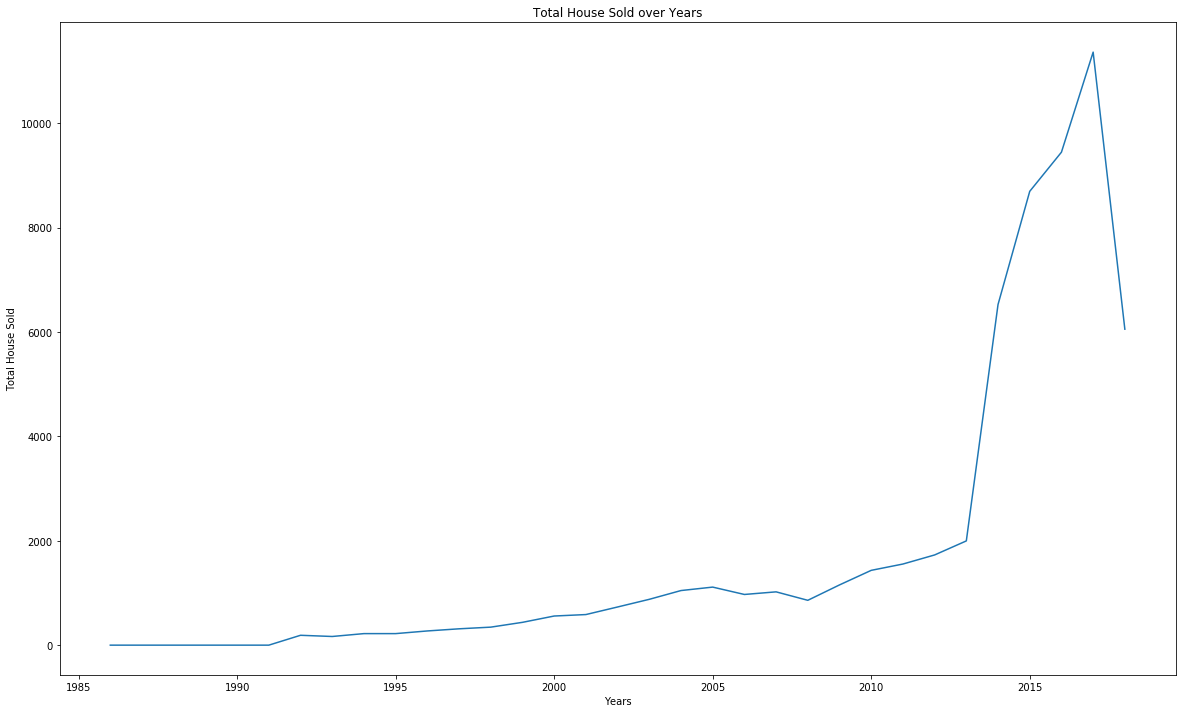

In [17]:
df.groupby(['SALEYEAR']).sum()['SALE_NUM'].plot(kind = 'line', figsize = (20,12))
plt.title('Total House Sold over Years')
plt.xlabel('Years')
plt.ylabel('Total House Sold')
plt.show()

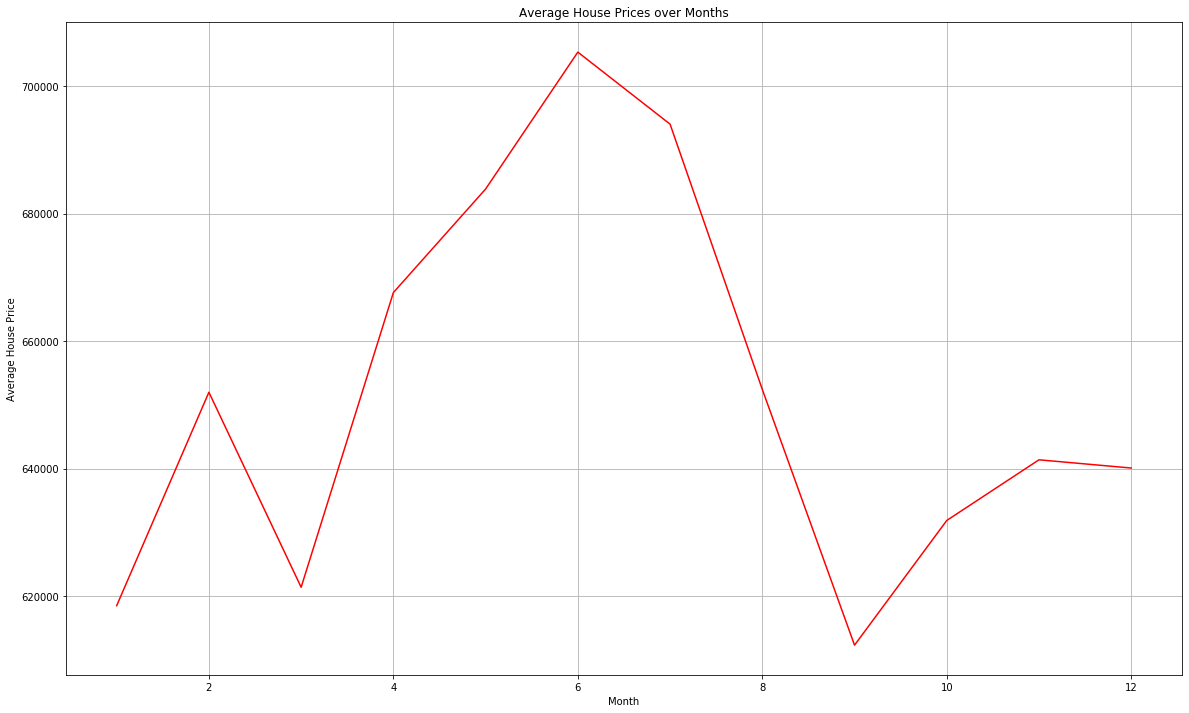

In [18]:
df.groupby(['SALEMONTH']).mean()['PRICE'].plot(kind = 'line', figsize = (20,12), color = 'r')
plt.grid()
plt.title('Average House Prices over Months')
plt.xlabel('Month')
plt.ylabel('Average House Price')
plt.show()

In [19]:
result = df.groupby(['QUADRANT']).sum()['SALE_NUM']
result.head()

QUADRANT
NE    19724
NW    27334
SE    12385
SW      457
Name: SALE_NUM, dtype: int64

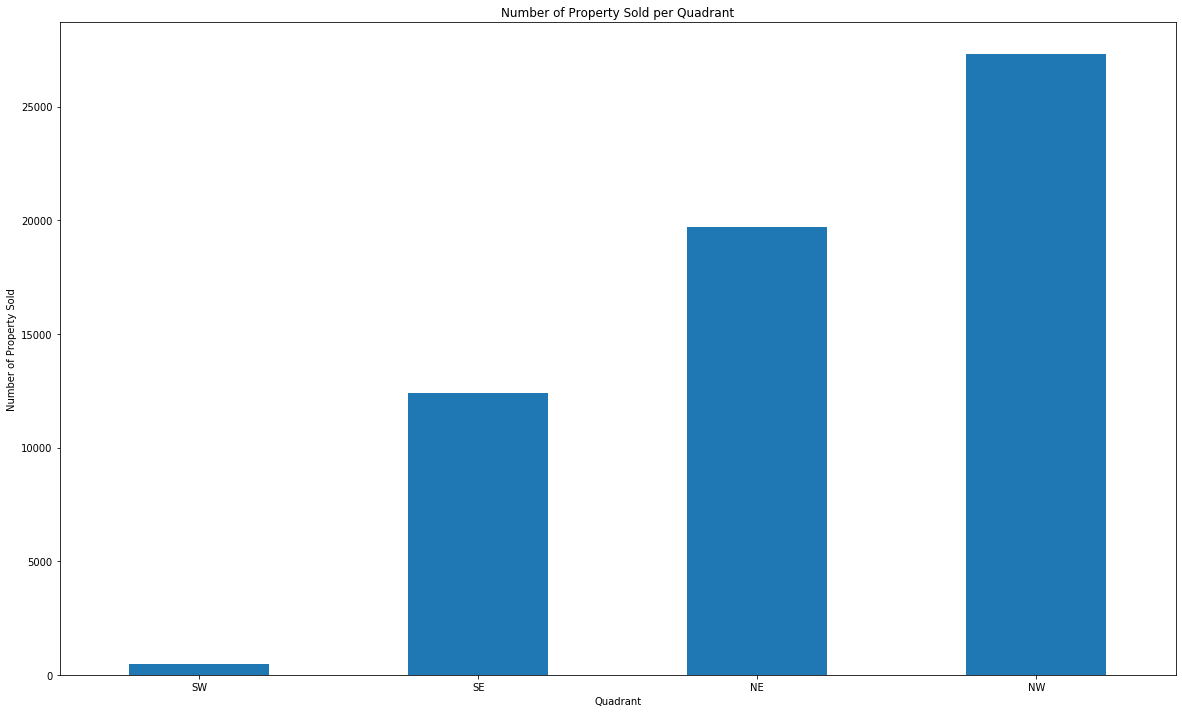

In [20]:
result.sort_values().plot(kind = 'bar', figsize = (20,12))
plt.title('Number of Property Sold per Quadrant')
plt.xlabel('Quadrant')
plt.ylabel('Number of Property Sold')
plt.xticks(rotation='horizontal')
plt.show()


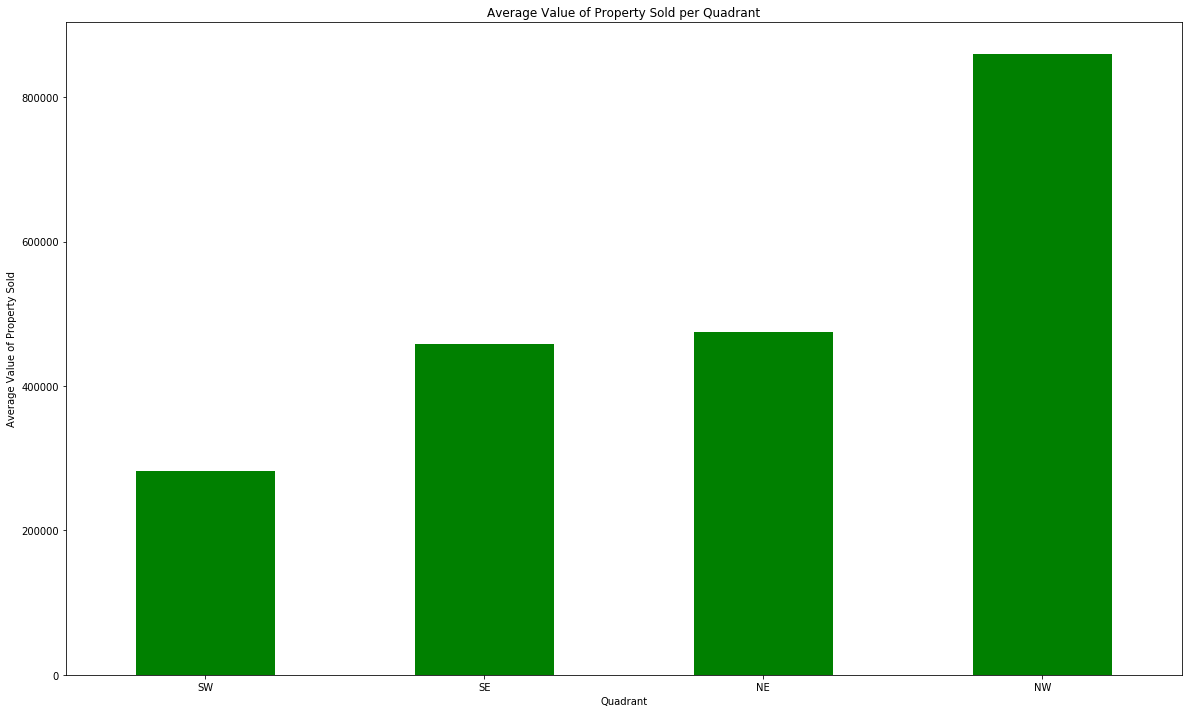

In [21]:
df.groupby(['QUADRANT']).mean()['PRICE'].sort_values().plot(kind = 'bar', figsize = (20,12), color = 'g')
plt.title('Average Value of Property Sold per Quadrant')
plt.xlabel('Quadrant')
plt.ylabel('Average Value of Property Sold')
plt.xticks(rotation='horizontal')
plt.show()

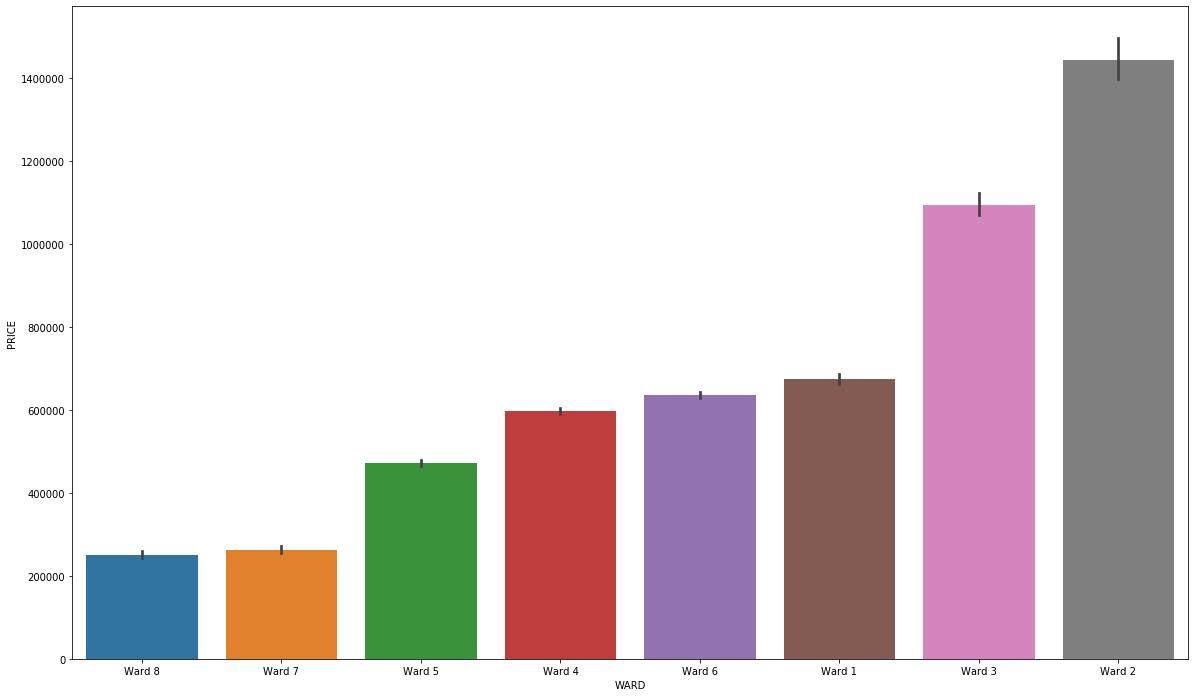

In [22]:
plt.figure(figsize = (20,12))
x_var = 'WARD'
sns.barplot(x = x_var, y = 'PRICE', data = df, order = df.groupby(x_var)['PRICE'].mean().sort_values().index)

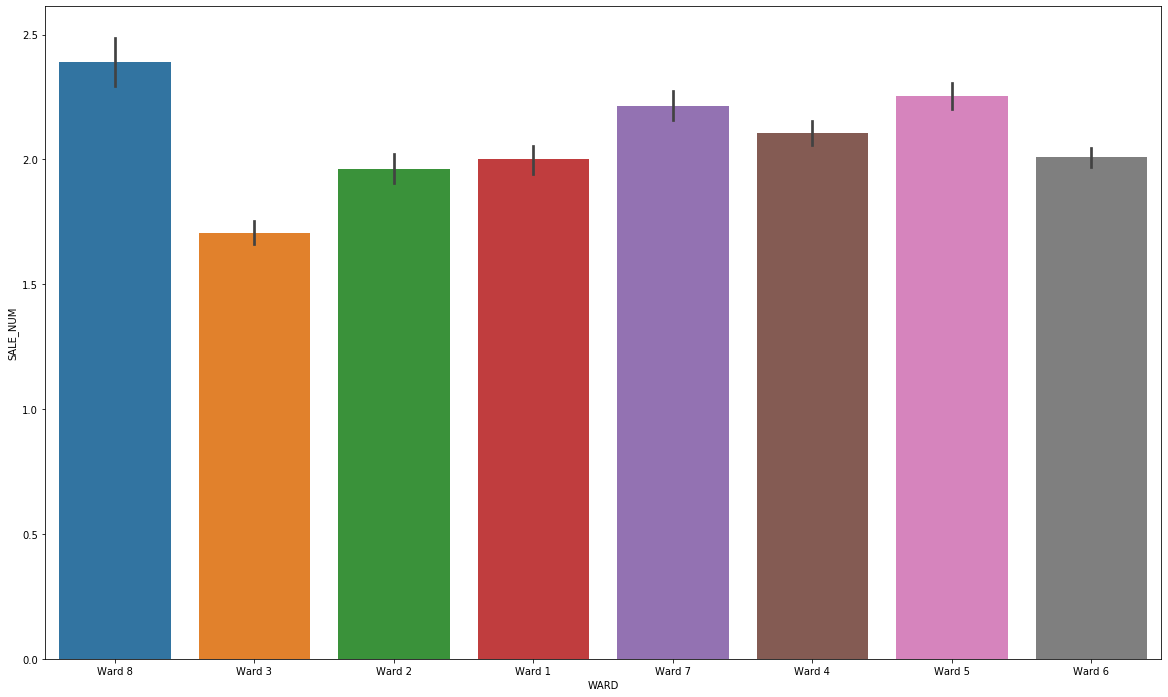

In [23]:
plt.figure(figsize = (20,12))
x = 'WARD'
sns.barplot(x = x_var, y = 'SALE_NUM', data = df, order = df.groupby(x_var)['SALE_NUM'].sum().sort_values().index)

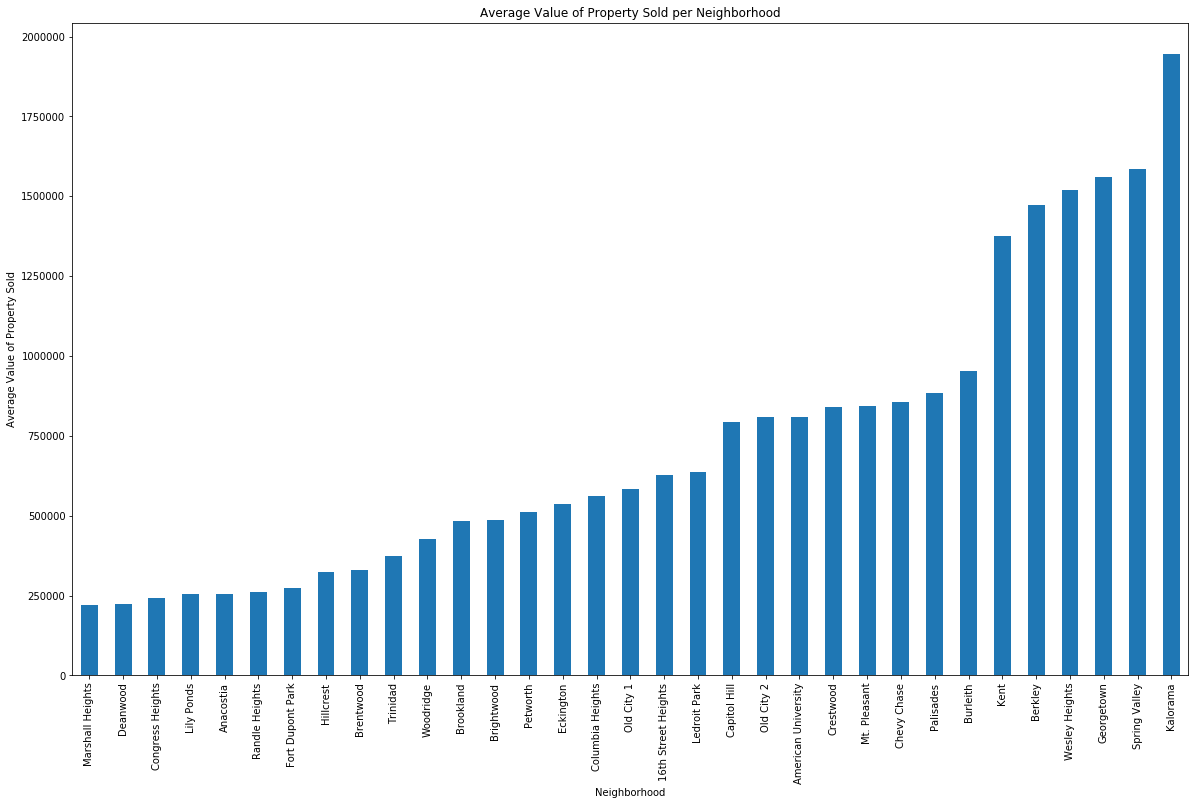

In [24]:
df.groupby(['ASSESSMENT_NBHD']).mean()['PRICE'].sort_values().plot(kind = 'bar', figsize = (20,12))
plt.title('Average Value of Property Sold per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Value of Property Sold')
plt.xticks(rotation='vertical')
plt.show()

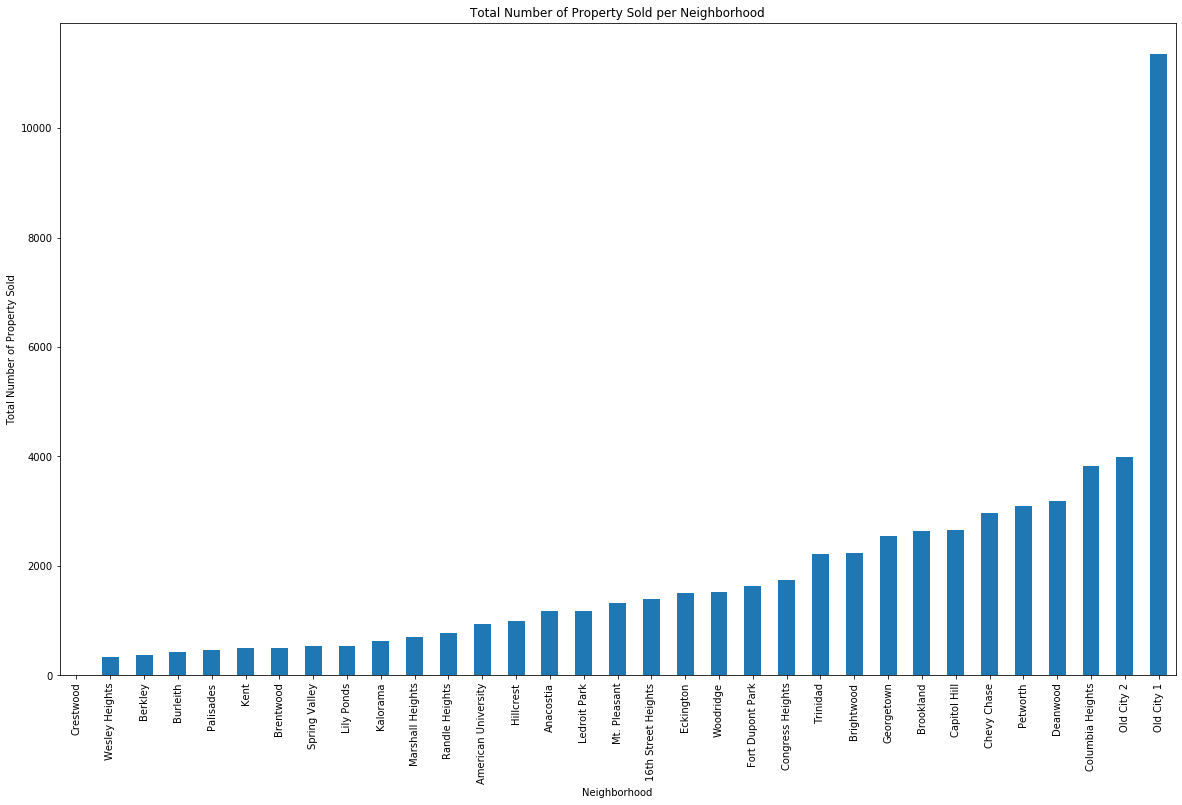

In [25]:
df.groupby(['ASSESSMENT_NBHD']).sum()['SALE_NUM'].sort_values().plot(kind = 'bar', figsize = (20,12))
plt.title('Total Number of Property Sold per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Property Sold')
plt.xticks(rotation='vertical')
plt.show()

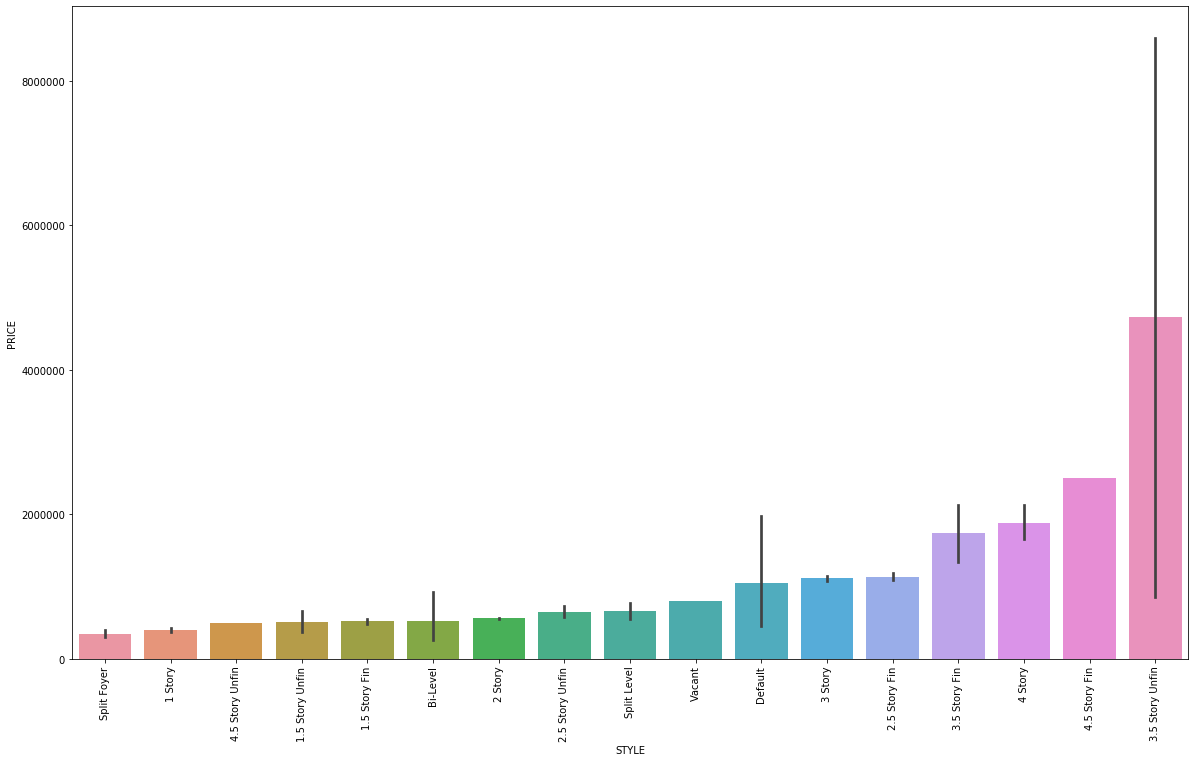

In [26]:
plt.figure(figsize = (20,12))
x_var = 'STYLE'
plt.xticks(rotation='vertical')
sns.barplot(x = x_var, y = 'PRICE', data = df, order = df.groupby(x_var)['PRICE'].mean().sort_values().index)

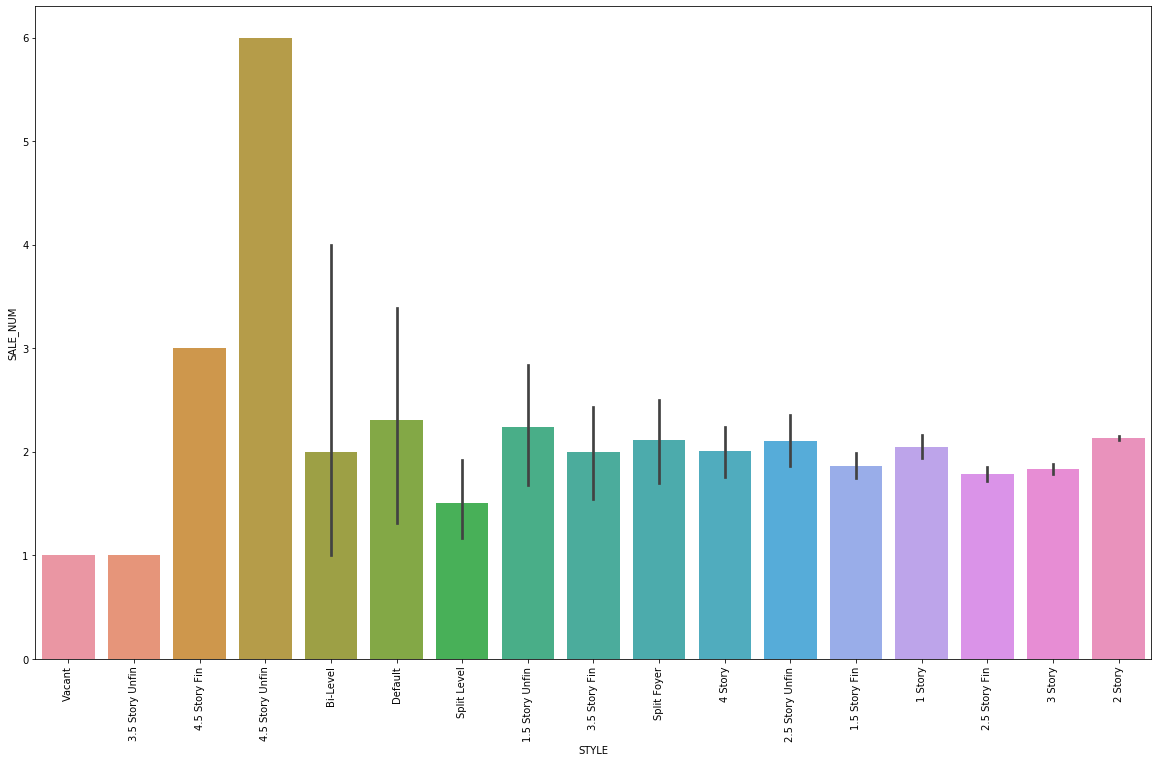

In [27]:
plt.figure(figsize = (20,12))
x = 'STYLE'
plt.xticks(rotation='vertical')
sns.barplot(x = x_var, y = 'SALE_NUM', data = df, order = df.groupby(x_var)['SALE_NUM'].sum().sort_values().index)

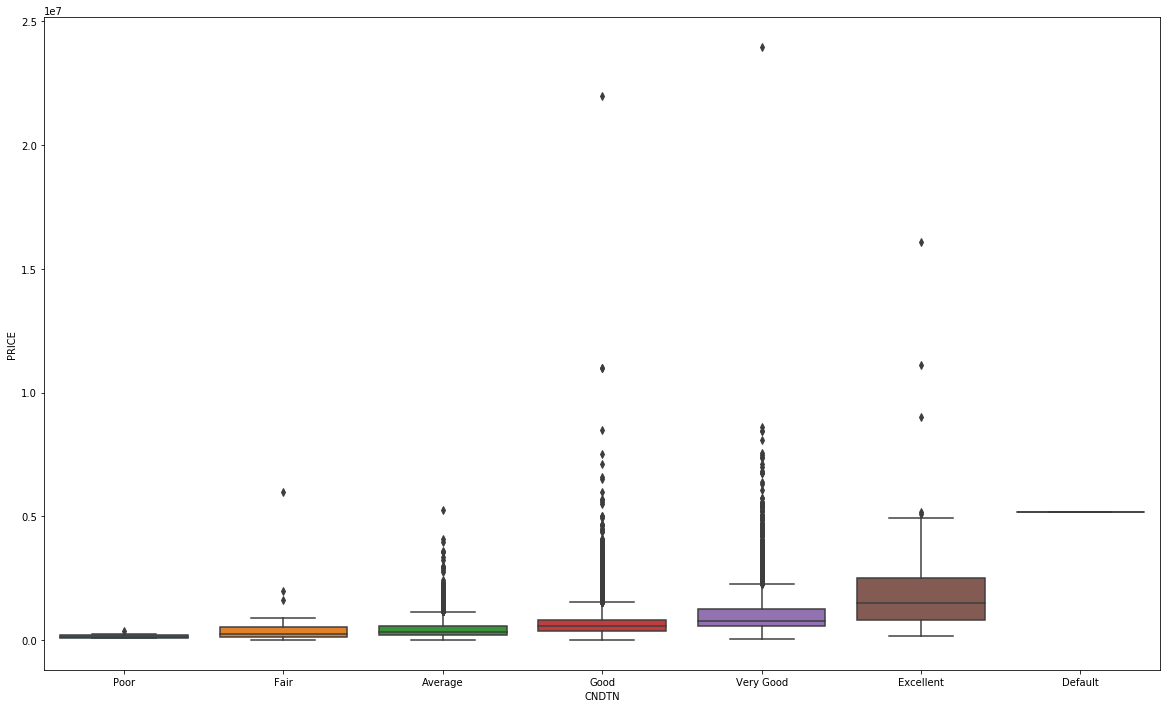

In [28]:
plt.figure(figsize = (20,12))
x_var = 'CNDTN'
sns.boxplot(x = x_var, y = 'PRICE', data = df, order = df.groupby(x_var)['PRICE'].mean().sort_values().index)

In [29]:
df = df[df.CNDTN != 'Default']

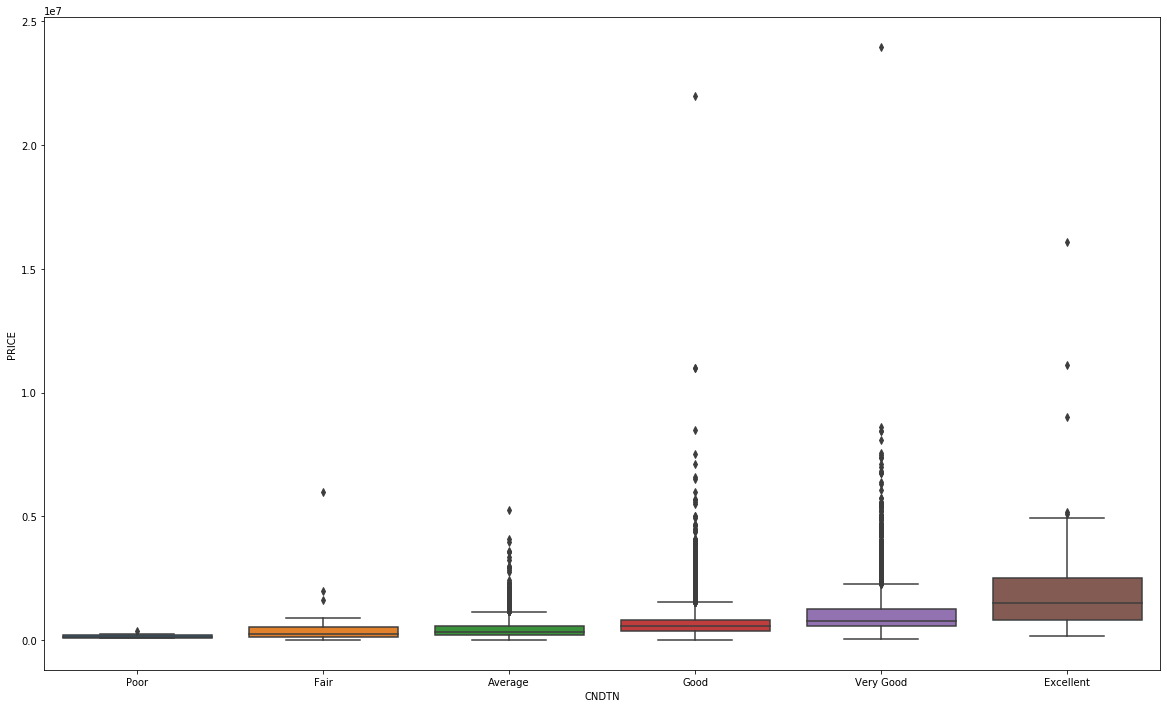

In [30]:
plt.figure(figsize = (20,12))
x_var = 'CNDTN'
sns.boxplot(x = x_var, y = 'PRICE', data = df, order = df.groupby(x_var)['PRICE'].mean().sort_values().index)

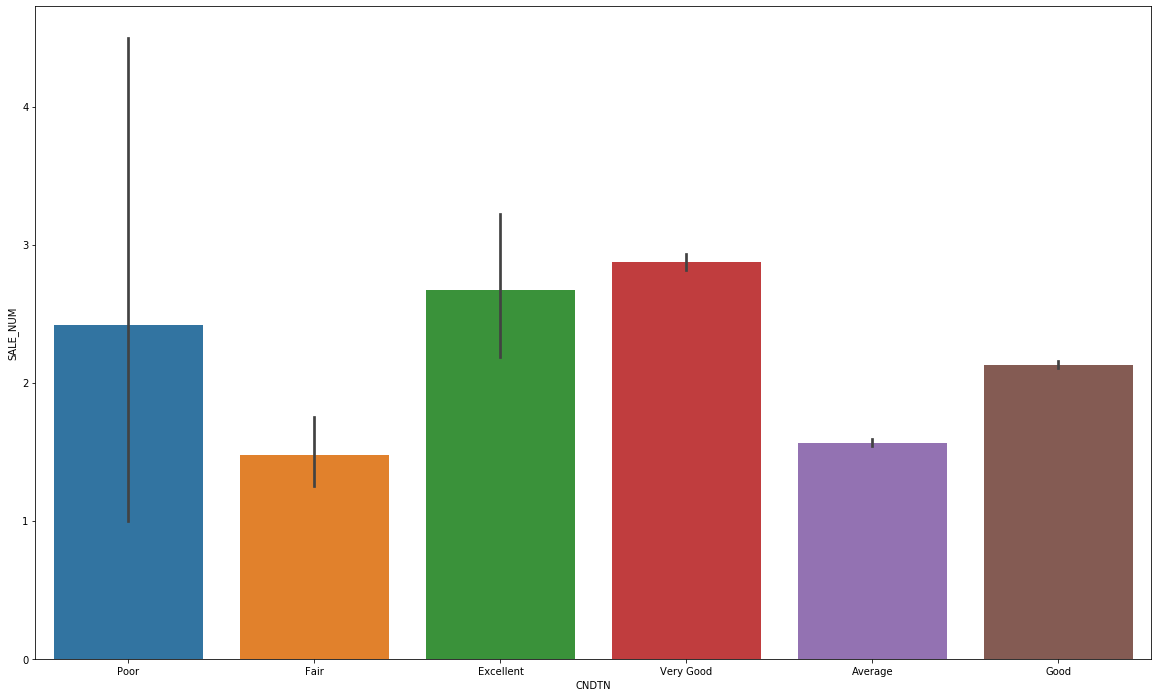

In [31]:
plt.figure(figsize = (20,12))
x_var = 'CNDTN'
sns.barplot(x = x_var, y = 'SALE_NUM', data = df, order = df.groupby(x_var)['SALE_NUM'].sum().sort_values().index)

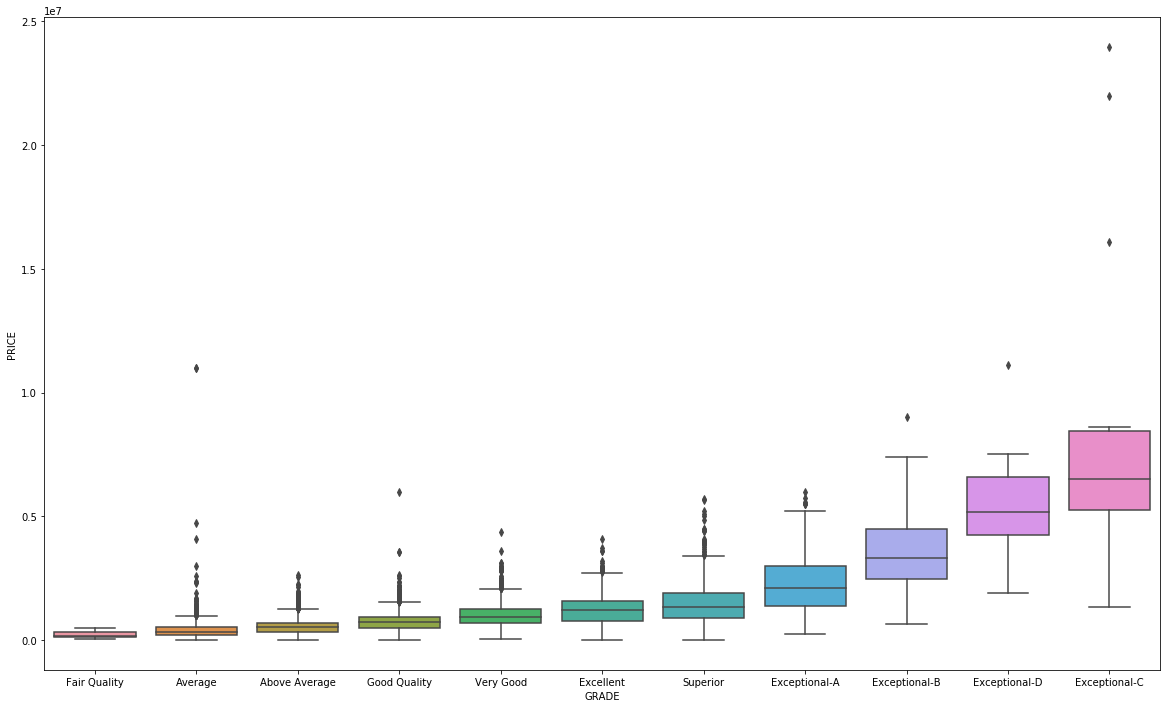

In [32]:
plt.figure(figsize = (20,12))
x_var = 'GRADE'
sns.boxplot(x = x_var, y = 'PRICE', data = df, order = df.groupby(x_var)['PRICE'].mean().sort_values().index)

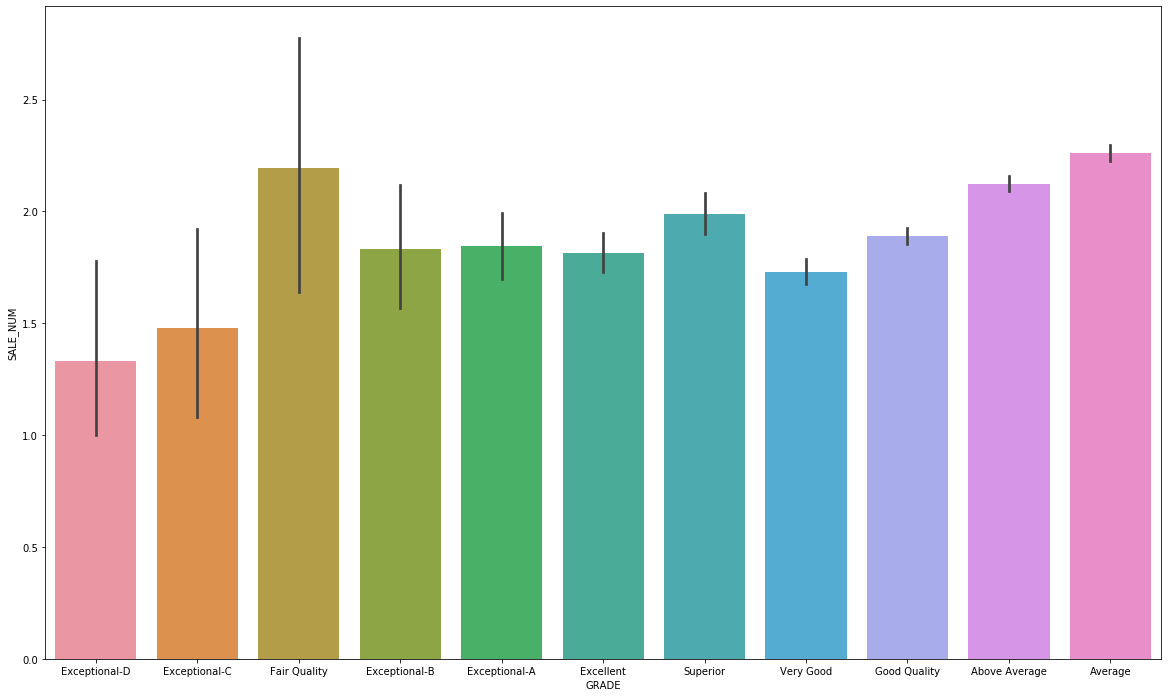

In [33]:
plt.figure(figsize = (20,12))
x_var = 'GRADE'
sns.barplot(x = x_var, y = 'SALE_NUM', data = df, order = df.groupby(x_var)['SALE_NUM'].sum().sort_values().index)

Condition Mapping

In [34]:
Map_Cond = {"Poor": 1, "Fair": 2, "Average": 3, "Good": 4, "Very Good": 5, "Excellent": 6}

df.CNDTN = df.CNDTN.apply(lambda x: Map_Cond[x])

Grade Mapping

In [35]:
Map_Grade = {"Fair Quality": 1, "Average": 2, "Above Average": 3, "Good Quality": 4, "Very Good": 5, "Excellent": 6, 
             "Superior": 7, "Exceptional-A": 8, "Exceptional-B": 9, "Exceptional-C": 10, "Exceptional-D": 11}

df.GRADE = df.GRADE.apply(lambda x: Map_Grade[x])

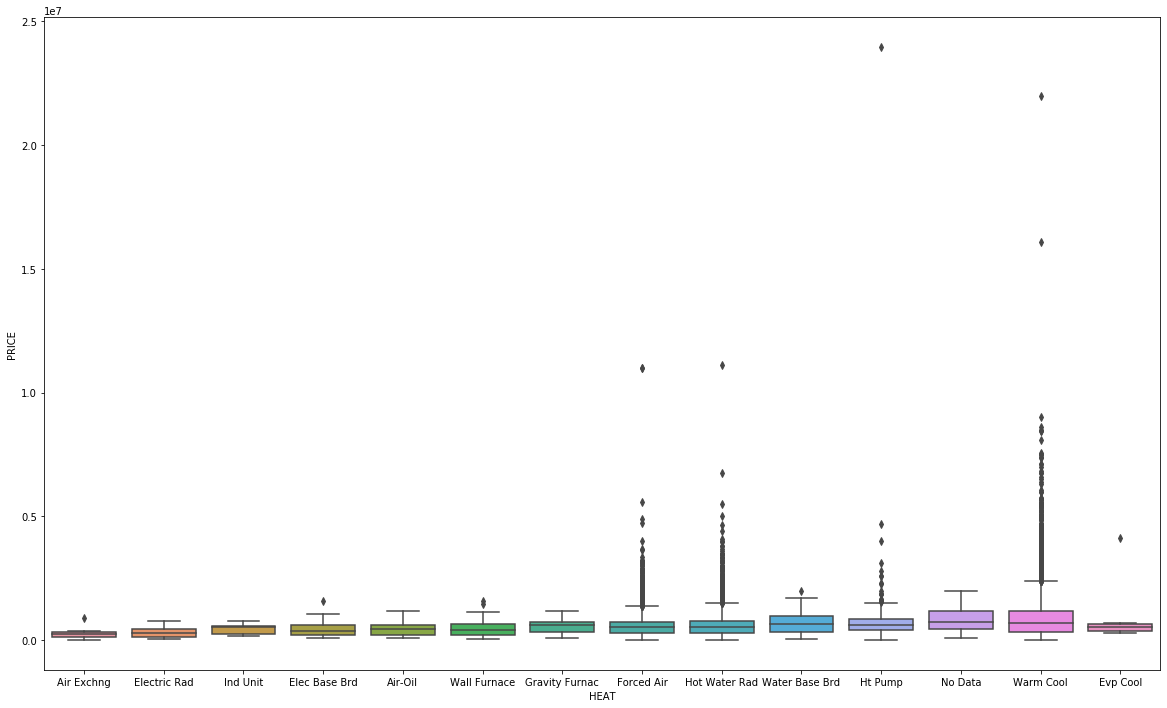

In [36]:
plt.figure(figsize = (20,12))
x_var = 'HEAT'
sns.boxplot(x = x_var, y = 'PRICE', data = df, order = df.groupby(x_var)['PRICE'].mean().sort_values().index)

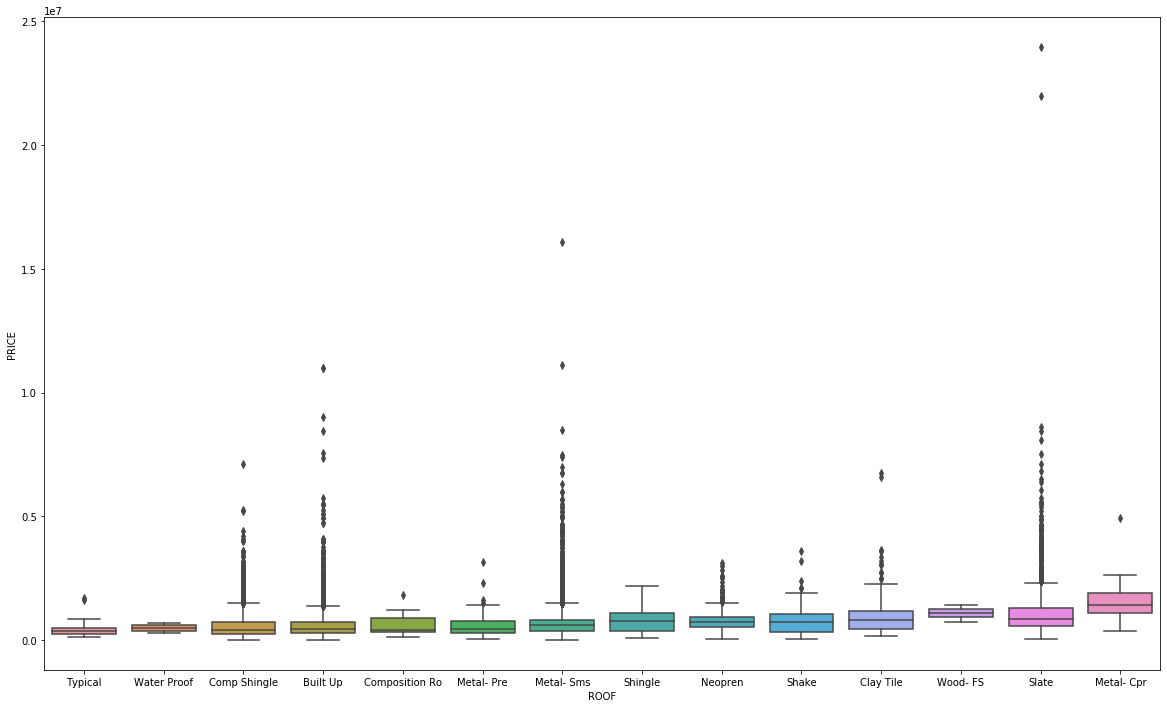

In [37]:
plt.figure(figsize = (20,12))
x_var = 'ROOF'
sns.boxplot(x = x_var, y = 'PRICE', data = df, order = df.groupby(x_var)['PRICE'].mean().sort_values().index)

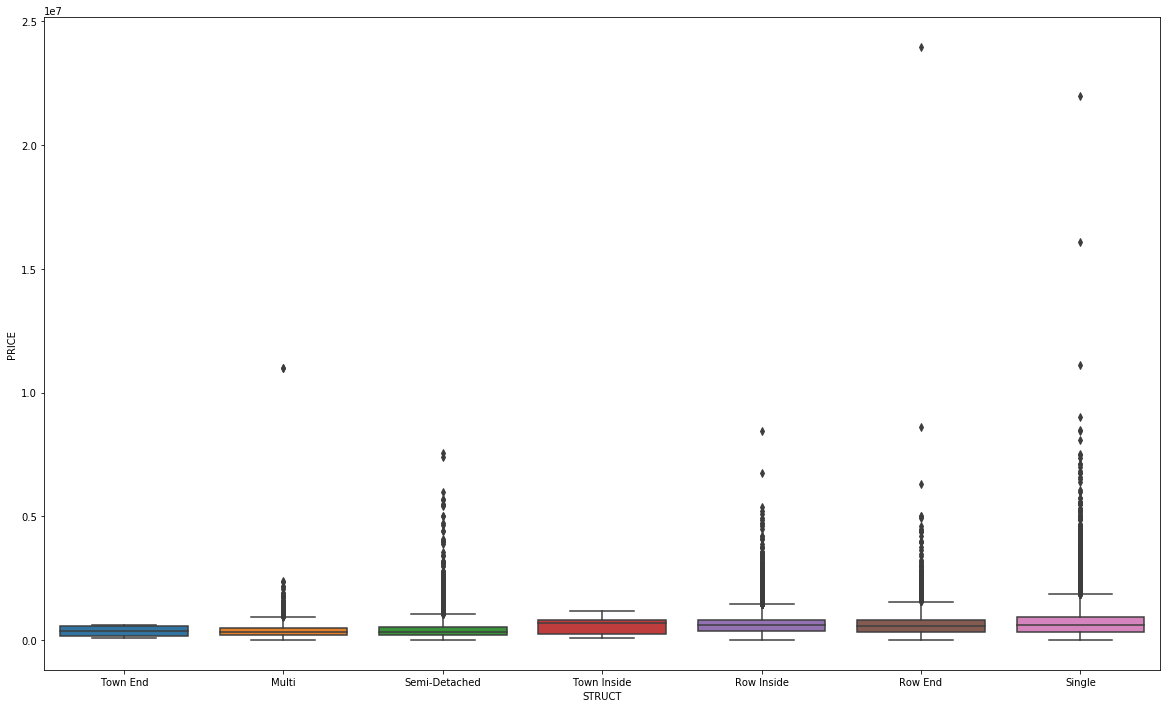

In [38]:
plt.figure(figsize = (20,12))
x_var = 'STRUCT'
sns.boxplot(x = x_var, y = 'PRICE', data = df, order = df.groupby(x_var)['PRICE'].mean().sort_values().index)

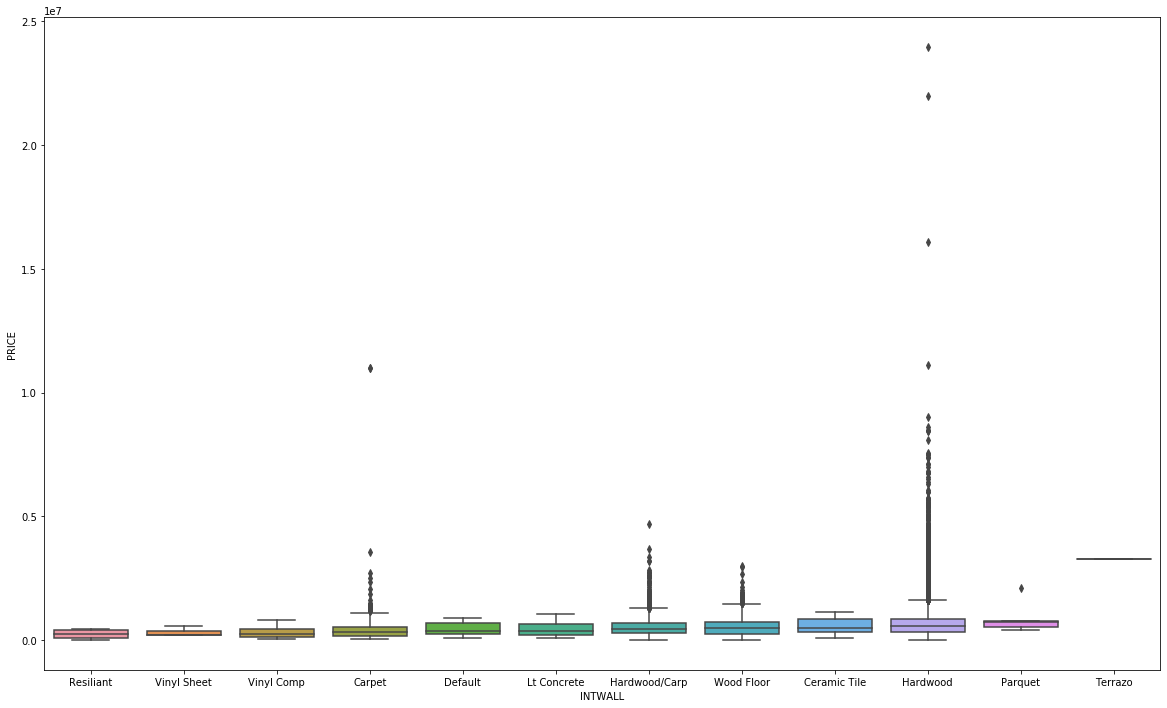

In [39]:
plt.figure(figsize = (20,12))
x_var = 'INTWALL'
sns.boxplot(x = x_var, y = 'PRICE', data = df, order = df.groupby(x_var)['PRICE'].mean().sort_values().index)

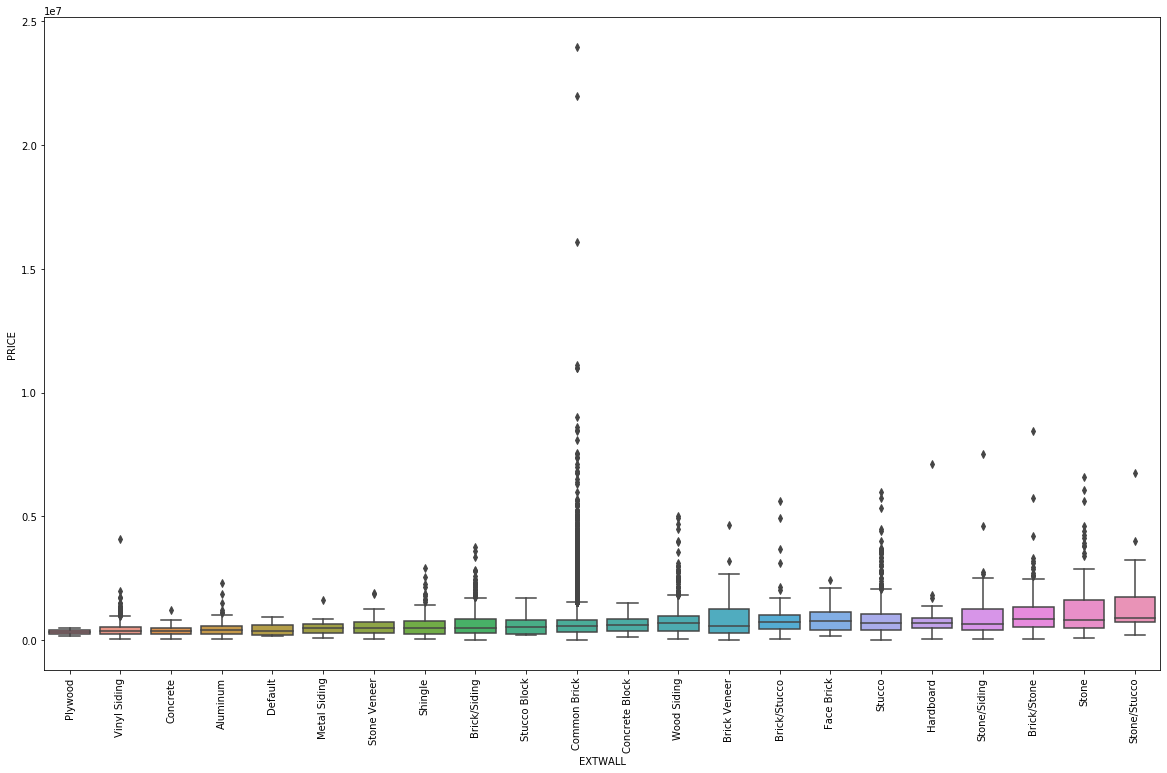

In [40]:
plt.figure(figsize = (20,12))
x_var = 'EXTWALL'
plt.xticks(rotation='vertical')
sns.boxplot(x = x_var, y = 'PRICE', data = df, order = df.groupby(x_var)['PRICE'].mean().sort_values().index)

In [41]:
numeric_data = df.select_dtypes(include = [np.number])

categorical_data = df.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 28 numerical and 20 categorical features in the data


In [42]:
numeric_data.head()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE,X,Y,SALEYEAR,SALEMONTH
0,4,0,2,8,4,1910,1988,1972,3.0,1095000,...,1680,20009,38.914680,-77.040832,4201,152,-77.040429,38.914881,2003,11
1,3,1,2,9,5,1910,2009,1984,3.0,2100000,...,1680,20009,38.914684,-77.040678,4201,152,-77.040429,38.914881,2016,6
2,3,1,2,8,5,1900,2003,1984,3.0,1602000,...,1680,20009,38.914683,-77.040629,4201,152,-77.040429,38.914881,2006,7
3,3,1,2,8,4,1906,2011,1972,3.0,1050000,...,1627,20009,38.915408,-77.040129,4201,152,-77.040429,38.914881,2011,9
4,3,1,2,7,3,1908,2008,1967,2.0,1430000,...,1424,20009,38.915017,-77.039903,4201,152,-77.040429,38.914881,2018,5


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

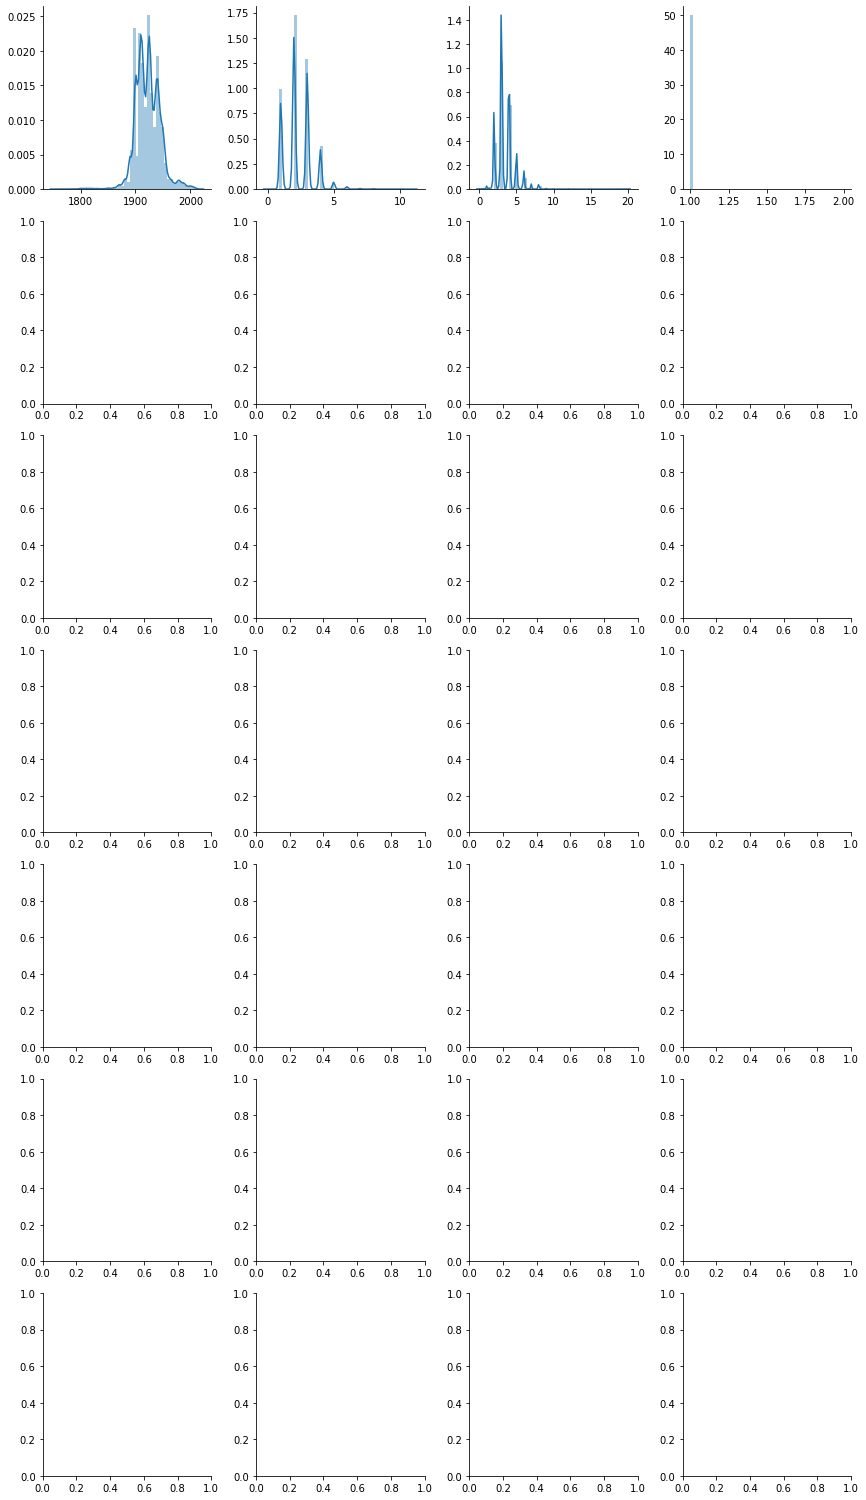

In [43]:
f = pd.melt(df, value_vars = sorted(numeric_data))
g = sns.FacetGrid(f, col = 'variable', col_wrap=4, sharex = False, sharey = False)
g = g.map(sns.distplot, 'value')

In [125]:
df['AYB'] = df.AYB.apply(lambda x: str(x))
df['EYB'] = df.EYB.apply(lambda x: str(x))
df['YR_RMDL'] = df.YR_RMDL.apply(lambda x: str(x))
df['ZIPCODE'] = df.ZIPCODE.apply(lambda x: str(x))
df['SALEYEAR'] = df.SALEYEAR.apply(lambda x: str(x))
df['SALEMONTH'] = df.SALEYEAR.apply(lambda x: str(x))

<Figure size 1440x1440 with 0 Axes>

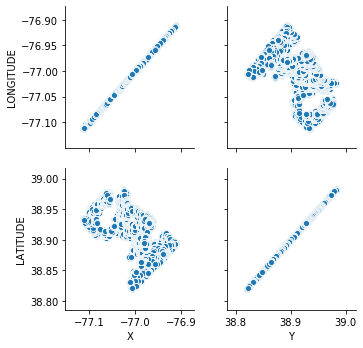

In [126]:
plt.figure(figsize = (20, 20))
sns.pairplot(df, x_vars = ['X', 'Y'], y_vars = ['LONGITUDE', 'LATITUDE'], palette = 'winter')

In [127]:
df.drop(columns = ['X', 'Y'], inplace = True)

In [128]:
df.sample(5)[['STYLE', 'STORIES']]

,STYLE,STORIES
8588,2 Story,2.0
15701,2 Story,2.0
18396,2 Story,2.0
20495,2 Story,2.0
4549,2 Story,2.0


In [129]:
df.drop(columns = ['STYLE'], inplace = True)

In [130]:
numeric_data = df.select_dtypes(include = [np.number])

categorical_data = df.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 20 numerical and 25 categorical features in the data


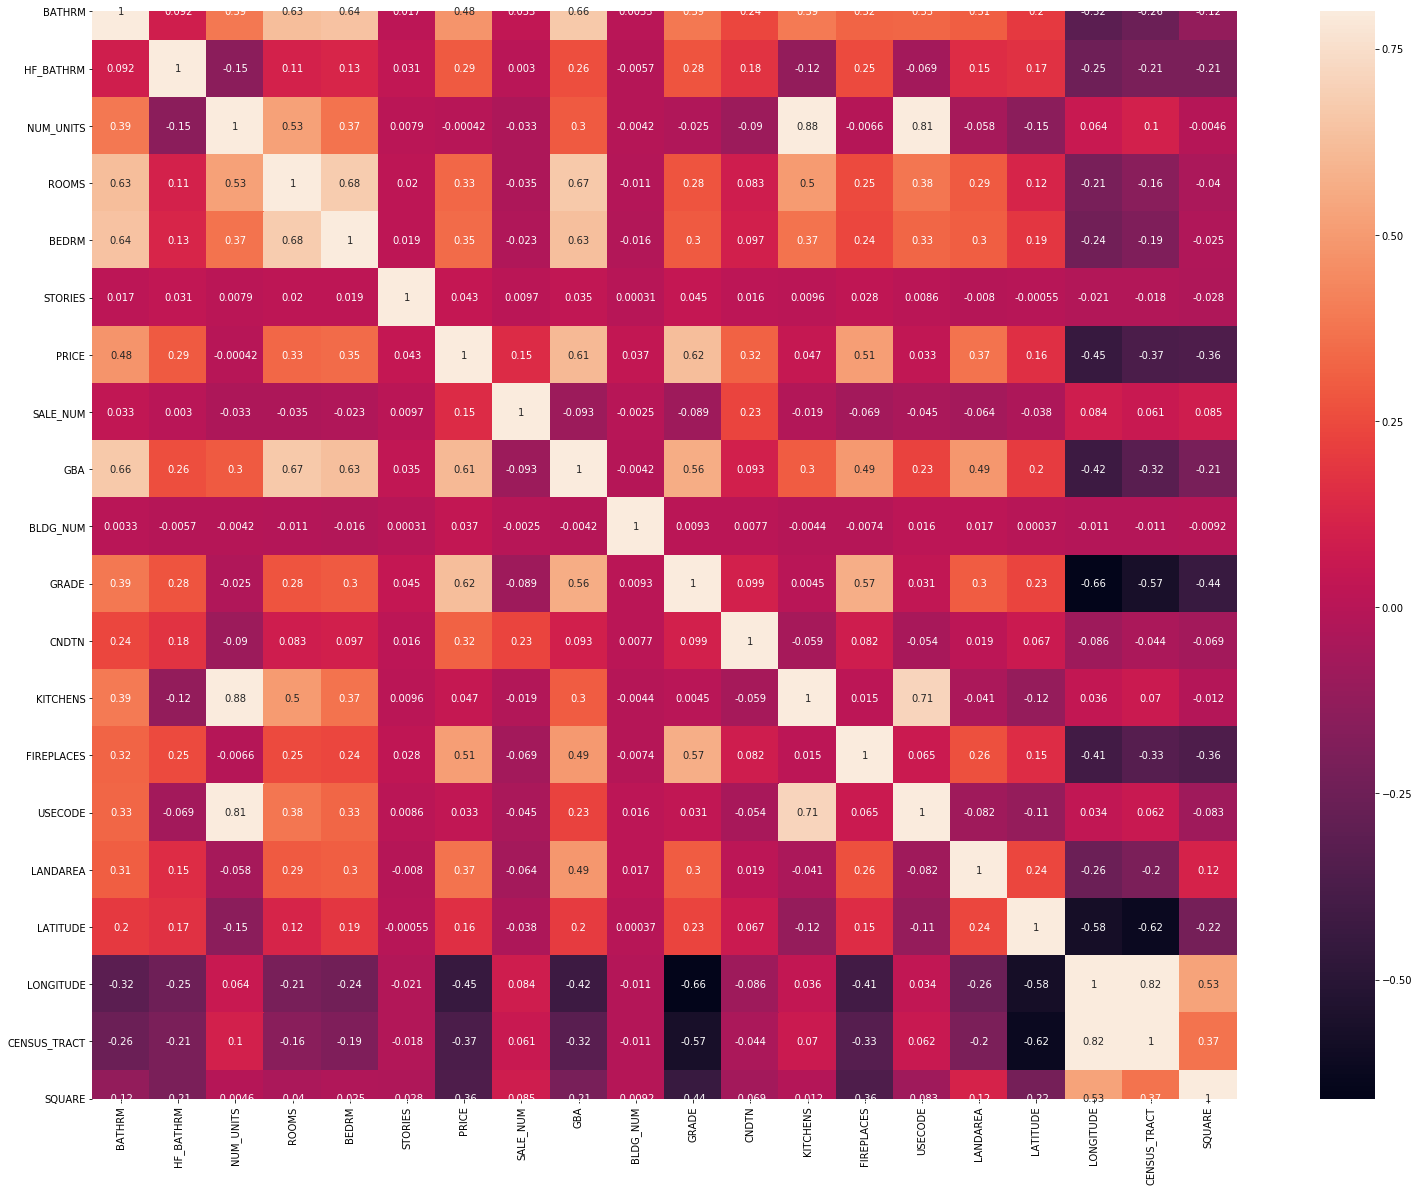

In [134]:
plt.figure(figsize = (30,20))
sns.heatmap(numeric_data.corr(), vmax = 0.8, annot=True, square = True)
plt.savefig('Corr.png')

In [135]:
df.drop(columns = ['USECODE'], inplace = True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28899 entries, 0 to 28899
Data columns (total 44 columns):
BATHRM                28899 non-null int64
HF_BATHRM             28899 non-null int64
HEAT                  28899 non-null object
AC                    28899 non-null object
NUM_UNITS             28899 non-null int64
ROOMS                 28899 non-null int64
BEDRM                 28899 non-null int64
AYB                   28899 non-null object
YR_RMDL               28899 non-null object
EYB                   28899 non-null object
STORIES               28899 non-null float64
SALEDATE              28899 non-null datetime64[ns]
PRICE                 28899 non-null int64
QUALIFIED             28899 non-null object
SALE_NUM              28899 non-null int64
GBA                   28899 non-null int64
BLDG_NUM              28899 non-null int64
STRUCT                28899 non-null object
GRADE                 28899 non-null int64
CNDTN                 28899 non-null int64
EXTWALL      

In [137]:
cols_to_drop = ['SALEDATE', 'AYB', 'EYB', 'BLDG_NUM', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'FULLADDRESS', 'CITY', 
               'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
               'CENSUS_BLOCK', 'SQUARE']
df.drop(columns = cols_to_drop, inplace = True)

In [138]:
numeric_data = df.select_dtypes(include = [np.number])

categorical_data = df.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 14 numerical and 13 categorical features in the data


In [139]:
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,YR_RMDL,STORIES,PRICE,...,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,ASSESSMENT_NBHD,WARD,QUADRANT,SALEYEAR,SALEMONTH
0,4,0,Warm Cool,Y,2,8,4,1988,3.0,1095000,...,Metal- Sms,Hardwood,2,5,1680,Old City 2,Ward 2,NW,2003,2003
1,3,1,Hot Water Rad,Y,2,9,5,2009,3.0,2100000,...,Built Up,Hardwood,2,4,1680,Old City 2,Ward 2,NW,2016,2016
2,3,1,Hot Water Rad,Y,2,8,5,2003,3.0,1602000,...,Built Up,Hardwood,2,3,1680,Old City 2,Ward 2,NW,2006,2006
3,3,1,Hot Water Rad,Y,2,8,4,2011,3.0,1050000,...,Metal- Sms,Hardwood,2,1,1627,Old City 2,Ward 2,NW,2011,2011
4,3,1,Warm Cool,Y,2,7,3,2008,2.0,1430000,...,Built Up,Hardwood,2,1,1424,Old City 2,Ward 2,NW,2018,2018


## Normalizing Data

In [140]:
Price = numeric_data.PRICE
numeric_norm =numeric_data.drop(['PRICE'], axis=1)

In [141]:
numeric_norm = numeric_norm.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [142]:
numeric_norm.head()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,STORIES,SALE_NUM,GBA,GRADE,CNDTN,KITCHENS,FIREPLACES,LANDAREA
0,0.363636,0.000000,0.333333,0.258065,0.20,0.003632,0.000000,0.145271,0.4,0.6,0.045455,0.384615,0.009403
1,0.272727,0.090909,0.333333,0.290323,0.25,0.003632,0.142857,0.145271,0.4,0.8,0.045455,0.307692,0.009403
2,0.272727,0.090909,0.333333,0.258065,0.25,0.003632,0.000000,0.142661,0.4,0.6,0.045455,0.230769,0.009403
3,0.272727,0.090909,0.333333,0.258065,0.20,0.003632,0.000000,0.136960,0.4,0.4,0.045455,0.076923,0.009063
4,0.272727,0.090909,0.333333,0.225806,0.15,0.002421,0.214286,0.074250,0.2,0.8,0.045455,0.076923,0.007759


## Handling Categorical Variables

In [143]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28899 entries, 0 to 28899
Data columns (total 13 columns):
HEAT               28899 non-null object
AC                 28899 non-null object
YR_RMDL            28899 non-null object
QUALIFIED          28899 non-null object
STRUCT             28899 non-null object
EXTWALL            28899 non-null object
ROOF               28899 non-null object
INTWALL            28899 non-null object
ASSESSMENT_NBHD    28899 non-null object
WARD               28899 non-null object
QUADRANT           28899 non-null object
SALEYEAR           28899 non-null object
SALEMONTH          28899 non-null object
dtypes: object(13)
memory usage: 4.3+ MB


In [144]:
from sklearn.preprocessing import LabelEncoder

categorical_data = categorical_data.apply(LabelEncoder().fit_transform)

In [145]:
df = pd.concat([numeric_norm, Price, categorical_data], axis=1, sort=False)

In [146]:
df.head()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,STORIES,SALE_NUM,GBA,GRADE,CNDTN,...,QUALIFIED,STRUCT,EXTWALL,ROOF,INTWALL,ASSESSMENT_NBHD,WARD,QUADRANT,SALEYEAR,SALEMONTH
0,0.363636,0.000000,0.333333,0.258065,0.20,0.003632,0.000000,0.145271,0.4,0.6,...,0,2,5,6,3,25,1,1,14,14
1,0.272727,0.090909,0.333333,0.290323,0.25,0.003632,0.142857,0.145271,0.4,0.8,...,0,2,5,0,3,25,1,1,27,27
2,0.272727,0.090909,0.333333,0.258065,0.25,0.003632,0.000000,0.142661,0.4,0.6,...,0,2,5,0,3,25,1,1,17,17
3,0.272727,0.090909,0.333333,0.258065,0.20,0.003632,0.000000,0.136960,0.4,0.4,...,0,2,5,6,3,25,1,1,22,22
4,0.272727,0.090909,0.333333,0.225806,0.15,0.002421,0.214286,0.074250,0.2,0.8,...,0,2,5,0,3,25,1,1,29,29


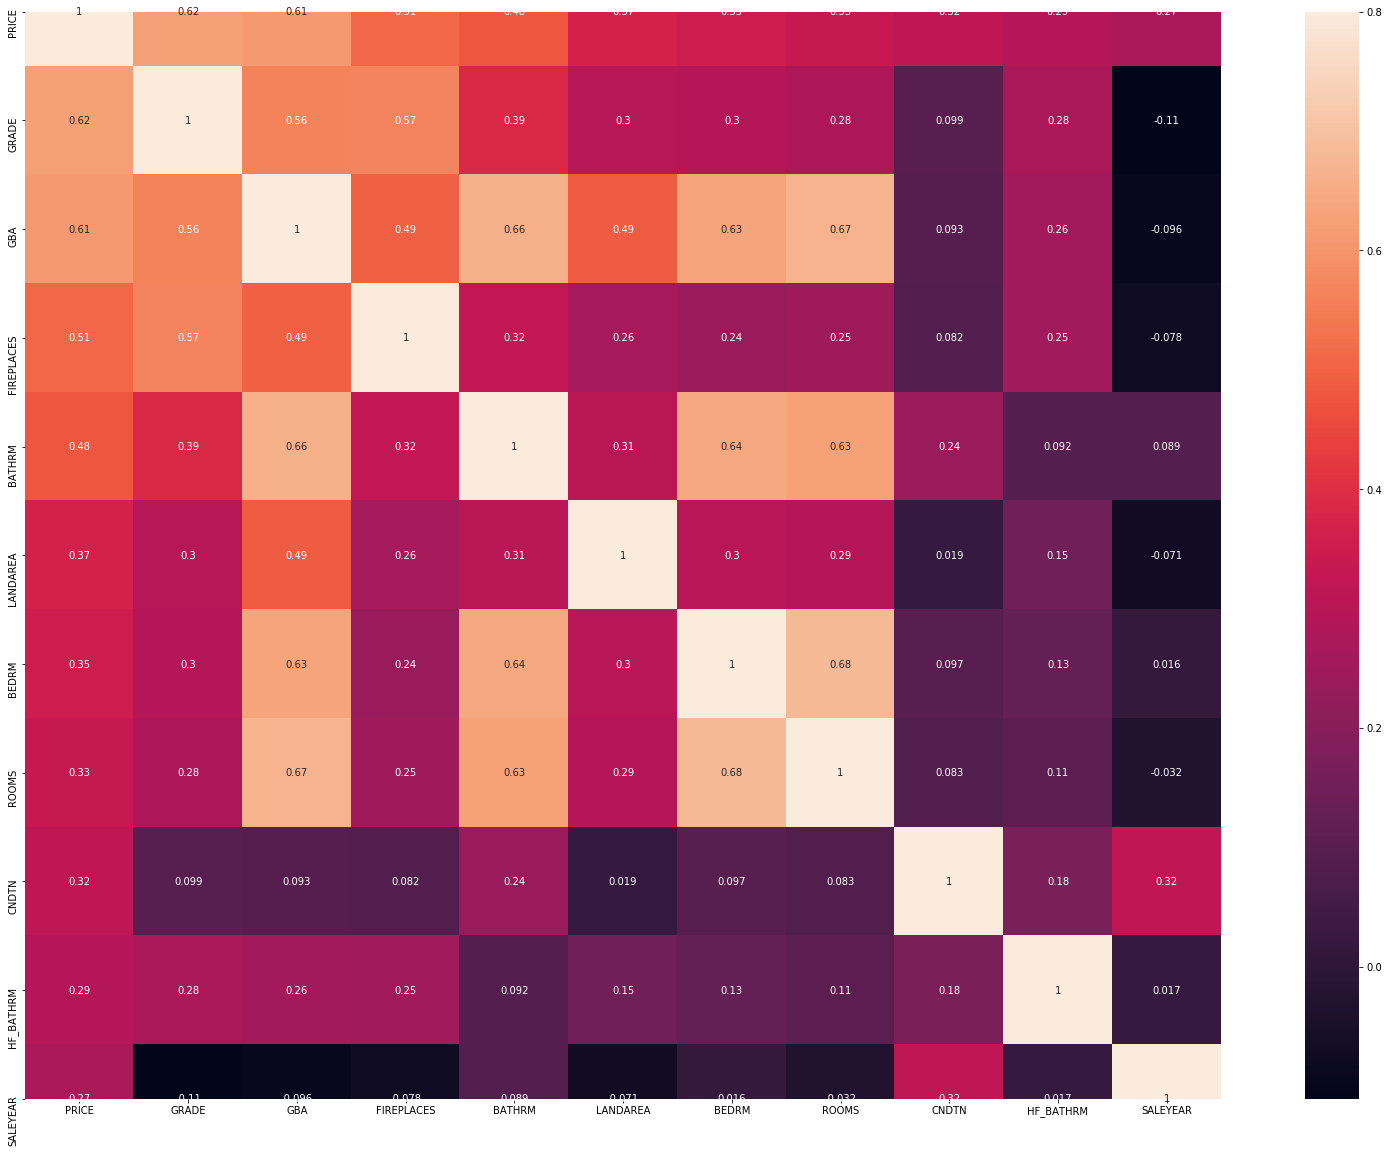

In [147]:
cols = df.corr().nlargest(11, 'PRICE')['PRICE'].index

plt.figure(figsize = (30,20))
sns.heatmap(df[cols].corr(), vmax=0.8, annot=True, square = True)
plt.savefig('Corr.png')

In [64]:
df[cols].head()

,PRICE,GRADE,GBA,FIREPLACES,BATHRM,LANDAREA,BEDRM,ROOMS,CNDTN,HF_BATHRM,SALEYEAR
0,1095000,0.4,0.145271,0.384615,0.363636,0.009403,0.20,0.258065,0.6,0.000000,14
1,2100000,0.4,0.145271,0.307692,0.272727,0.009403,0.25,0.290323,0.8,0.090909,27
2,1602000,0.4,0.142661,0.230769,0.272727,0.009403,0.25,0.258065,0.6,0.090909,17
3,1050000,0.4,0.136960,0.076923,0.272727,0.009063,0.20,0.258065,0.4,0.090909,22
4,1430000,0.2,0.074250,0.076923,0.272727,0.007759,0.15,0.225806,0.8,0.090909,29


## Train_Test Split

In [65]:
from sklearn.model_selection import train_test_split

X = df[cols].drop(columns = 'PRICE')
y = df[cols].PRICE

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.30, random_state = 7 )

## Data Modeling

In [66]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

/Users/rajatdua/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [67]:
from collections import defaultdict
values = defaultdict(list)
model_names = list()

In [68]:
def err(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print('RMSE: {0:.3f}'.format(rmse))
    print('R2 Score: {0:.3f}'.format(r2))
    
    model_names.append(model_name)
    values['RMSE'].append(rmse)
    values['R2_Score'].append(r2)

In [69]:
LinReg = make_pipeline(RobustScaler(), LinearRegression())
LinReg.fit(X_train, y_train)
err(LinReg, 'Linear_Regression', X_test, y_test)

RMSE: 337467.122
R2 Score: 0.653


In [70]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))
lasso.fit(X_train, y_train)
err(lasso, 'Lasso', X_test, y_test)

RMSE: 337467.122
R2 Score: 0.653


In [71]:
ridge = make_pipeline(RobustScaler(), Ridge(alpha = 0.0005, random_state = 1))
ridge.fit(X_train, y_train)
err(ridge, 'Ridge', X_test, y_test)

RMSE: 337467.121
R2 Score: 0.653


In [72]:
elnet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, random_state = 1))
elnet.fit(X_train, y_train)
err(elnet, 'Elastic_Net', X_test, y_test)

RMSE: 337464.481
R2 Score: 0.653


In [73]:
dtr = make_pipeline(RobustScaler(), DecisionTreeRegressor())
dtr.fit(X_train, y_train)
err(dtr, 'Decision Tree', X_test, y_test)

RMSE: 329324.048
R2 Score: 0.669


In [74]:
ranfor = RandomForestRegressor()
ranfor.fit(X_train, y_train)
err(ranfor, 'Random Forest', X_test, y_test)

RMSE: 254953.401
R2 Score: 0.802


In [75]:
gradboost = GradientBoostingRegressor(n_estimators = 1000)
gradboost.fit(X_train, y_train)
err(gradboost, 'Gradient Boosting', X_test, y_test)

RMSE: 252607.796
R2 Score: 0.805


In [76]:
xgboost = xgb.XGBRegressor(n_estimators = 1000)
xgboost.fit(X_train, y_train)
err(xgboost, 'XG Boost', X_test, y_test)

[20:01:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/rajatdua/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE: 263887.241
R2 Score: 0.788


In [77]:
lgbm = lgb.LGBMRegressor(objective = 'regression', num_leaves = 5, n_estimators = 1000)
lgbm.fit(X_train, y_train)
err(lgbm, 'Light GBM', X_test, y_test)

RMSE: 237725.757
R2 Score: 0.828


In [78]:
Val = pd.DataFrame(values, index = None)
Model = pd.DataFrame(model_names, index = None, columns = ['Model']) 
Val = pd.concat([Model, Val], axis=1, sort=False)

In [79]:
Val

,Model,RMSE,R2_Score
0,Linear_Regression,337467.121683,0.652529
1,Lasso,337467.121587,0.652529
2,Ridge,337467.121417,0.652529
3,Elastic_Net,337464.480904,0.652534
4,Decision Tree,329324.047850,0.669095
5,Random Forest,254953.401206,0.801675
6,Gradient Boosting,252607.796075,0.805307
7,XG Boost,263887.241276,0.787532
8,Light GBM,237725.757133,0.827572


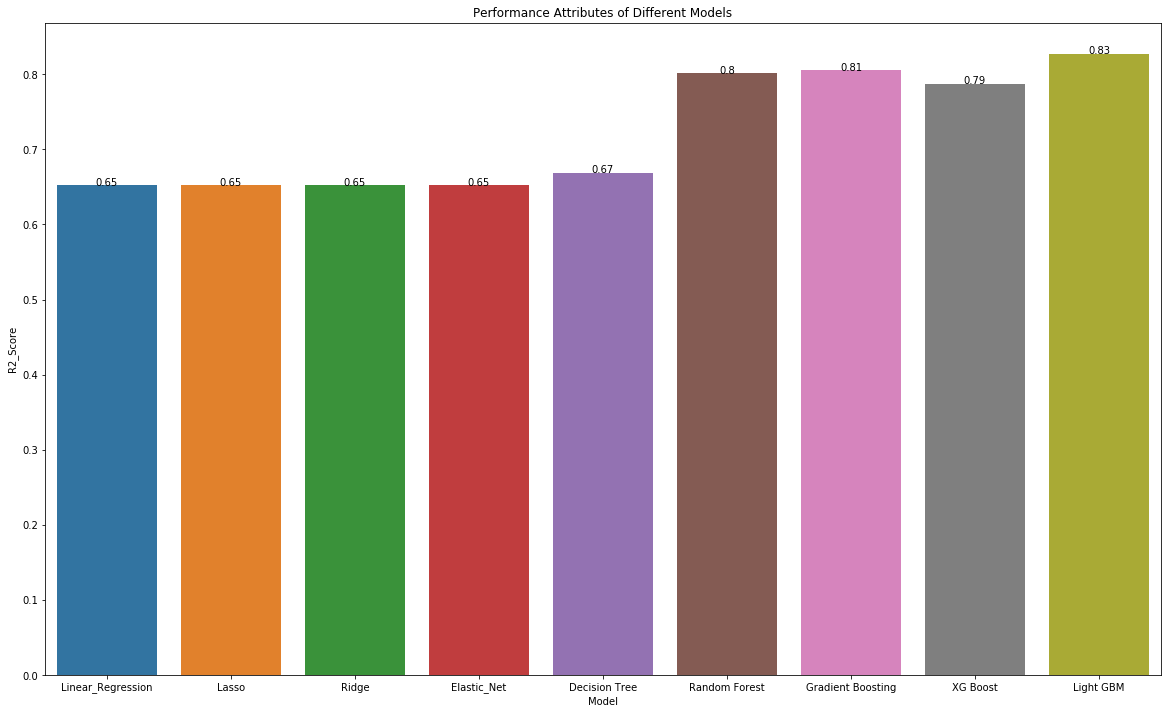

In [80]:
plt.figure(figsize = (20,12))
x_var = 'Model'
g = sns.barplot(x = x_var, y = 'R2_Score', data = Val)
plt.title('Performance Attributes of Different Models')
for index, row in Val.iterrows():
    g.text(row.name,row.R2_Score, round(row.R2_Score,2), color='black', ha="center")